In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family':'Times New Roman'})
import seaborn as sns
import pandas as pd

In [2]:
sns.reset_defaults()
sns.set(
    rc={'figure.figsize':(7,5)}, 
    style="white" # nicer layout
)

In [123]:
dframe = pd.read_csv('dframe_jobs_processed.csv', sep='|', encoding='UTF-16')
dframe['responsabilities_and_other_details'] = (dframe['job_main_responsabilities_pt_processed'] + dframe['job_other_details_pt_processed']).str.strip()

In [124]:
dframe.head()

,company_name,job_area,job_link,job_extraction_timestamp,job_title,job_location,job_main_responsabilities,job_other_details,job_main_responsabilities_lang,job_other_details_lang,job_main_responsabilities_pt,job_other_details_pt,job_main_responsabilities_pt_processed,job_other_details_pt_processed,job_title_type,Macro_job_area,responsabilities_and_other_details
0,99,Finance,https://carreiras.99app.com/jobdetail/?vagaid=...,2021-06-27 11:38:13.363,Finance and Planning Manager,Brazil,-Detailed analysis of P&L variances versus for...,"- Strong expertise managing budget, forecast, ...",en,en,-Análise detalhada das variações de P&L versus...,- Forte experiência em gerenciamento de orçame...,análise detalhada das variações de p&l versus ...,forte experiência em gerenciamento de orçament...,management_manager,Finance & Legal,análise detalhada das variações de p&l versus ...
1,99,Finance,https://carreiras.99app.com/jobdetail/?vagaid=...,2021-06-27 11:42:08.465,Finance Business Partner,Colombia,Evaluate the end to end financial process for ...,"University graduate in the domain of Finance, ...",en,en,Avalie o processo financeiro de ponta a ponta ...,Graduação universitária no domínio de Finanças...,avalie o processo financeiro de ponta a ponta ...,graduação universitária no domínio de finanças...,business_partner,Finance & Legal,avalie o processo financeiro de ponta a ponta ...
2,99,Finance,https://carreiras.99app.com/jobdetail/?vagaid=...,2021-06-27 11:44:29.556,Finance Manager,Mexico,"1. Financial Budget, Forecast, Closing, ...",The successful applicant:\nUniversity graduate...,en,en,"1. Orçamento Financeiro, Previsão, Fechamento,...",O candidato bem-sucedido: Graduado universitár...,1 orçamento financeiro previsão fechamento con...,o candidato bemsucedido: graduado universitári...,management_manager,Finance & Legal,1 orçamento financeiro previsão fechamento con...
3,99,Finance,https://carreiras.99app.com/jobdetail/?vagaid=...,2021-06-27 11:46:47.127,Finance Manager FP&A,Mexico,"1. Financial Budget, Forecast, Closing, ...","University graduate in Finance, Commerce or En...",en,en,"1. Orçamento Financeiro, Forecast, Fechamento,...","Graduação universitária em Finanças, Comércio ...",1 orçamento financeiro forecast fechamento con...,graduação universitária em finanças comércio o...,management_manager,Finance & Legal,1 orçamento financeiro forecast fechamento con...
4,99,Finance,https://carreiras.99app.com/jobdetail/?vagaid=...,2021-06-27 11:49:03.129,Finance Senior Manager,Mexico,"1. Financial Budget, Forecast, Closing, ...","University graduate in the domain of Finance, ...",en,en,"1. Orçamento Financeiro, Previsão, Fechamento,...","Graduado universitário no domínio de Finanças,...",1 orçamento financeiro previsão fechamento con...,graduado universitário no domínio de finanças ...,management_manager,Finance & Legal,1 orçamento financeiro previsão fechamento con...


Let's start plotting!

In [125]:
dframe_location_and_language = dframe.groupby(['job_location'],as_index=False)['job_extraction_timestamp'].count()
dframe_location_and_language.columns = ['Location','Qty']
dframe_location_and_language = dframe_location_and_language.sort_values('Qty',ascending=True)

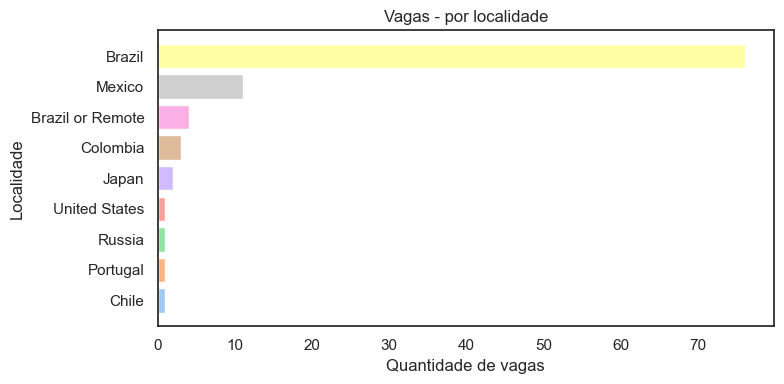

In [126]:
plt.figure(figsize=(8,4), tight_layout=True)
colors = sns.color_palette('pastel')
plt.barh(dframe_location_and_language['Location'], dframe_location_and_language['Qty'], color=colors)
plt.xlabel('Quantidade de vagas')
plt.ylabel('Localidade')
plt.title('Vagas - por localidade')
plt.show()

In [127]:
dframe_job_title_type = dframe.groupby(['job_title_type'],as_index=False)['job_extraction_timestamp'].count()
dframe_job_title_type.columns = ['Job Title Type','Qty']
dframe_job_title_type = dframe_job_title_type.sort_values('Qty',ascending=True).reset_index()

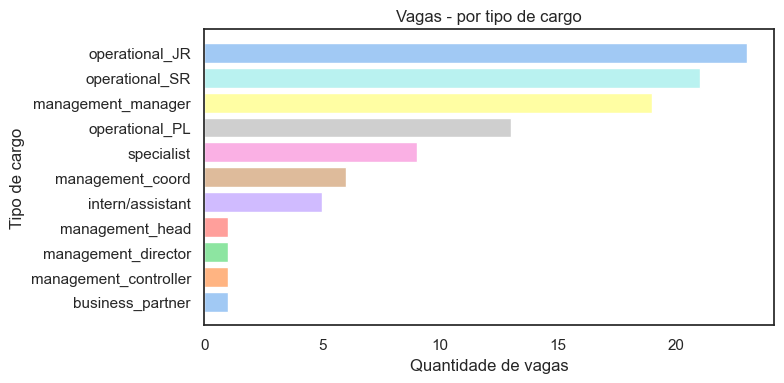

In [128]:
plt.figure(figsize=(8,4), tight_layout=True)
colors = sns.color_palette("pastel")
plt.barh(dframe_job_title_type['Job Title Type'], dframe_job_title_type['Qty'], color=colors)
plt.xlabel('Quantidade de vagas')
plt.ylabel('Tipo de cargo')
plt.title('Vagas - por tipo de cargo')
plt.show()

In [129]:
dframe_job_lang = dframe.groupby(['job_main_responsabilities_lang'],as_index=False)['job_extraction_timestamp'].count()
dframe_job_lang.columns = ['Language of the job posted','Qty']
dframe_job_lang = dframe_job_lang.sort_values('Qty',ascending=False).reset_index()

In [130]:
dframe_job_lang

,index,Language of the job posted,Qty
0,2,pt,58
1,0,en,41
2,1,es,1


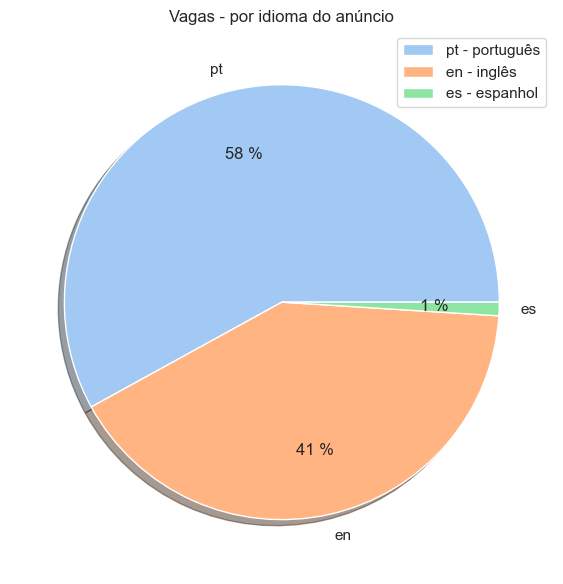

In [131]:
colors = sns.color_palette('pastel')
plt.figure(figsize=(7, 6), tight_layout=True)
plt.pie(dframe_job_lang['Qty'], labels=dframe_job_lang['Language of the job posted'], pctdistance=.7, autopct='%.0f %%',
          colors=colors, shadow=True)
plt.title('Vagas - por idioma do anúncio')
plt.legend(['pt - português','en - inglês', 'es - espanhol'])
plt.show()

In [158]:
dframe_tech_skills = pd.read_excel('glossary_tech_manually_reviewed.xlsx')

In [159]:
dframe_tech_skills.head()

,category_en,skill_en,description_en,skill_en_processed,skill_en_processed_no_spaces,skill_pt,skill_pt_processed,skill_pt_processed_no_spaces,comments
0,Back-end Technologies Python,asyncio,A library to write concurrent code using the a...,asyncio,asyncio,asyncio,asyncio,asyncio,NaN
1,Back-end Technologies Python,BeeWare,Collection of projects that can be used to hel...,beeware,beeware,BeeWare,beeware,beeware,NaN
2,Back-end Technologies Python,Bokeh,An interactive visualization library for Pytho...,bokeh,bokeh,Bokeh,bokeh,bokeh,NaN
3,Back-end Technologies Python,Bottle,"Fast, simple and lightweight WSGI micro web-fr...",bottle,bottle,Bottle,bottle,bottle,NaN
4,Back-end Technologies Python,Buildbot,Python-based software development continuous i...,buildbot,buildbot,Buildbot,buildbot,buildbot,NaN


In [111]:
# For each IT skill, every term is splitted into single words, then all duplicates are removed, eg. apache avro & apache flink became only three single words 'apache', 'avro', and 'flink'
""" bag_of_words_back_end_tech_python = list(dict.fromkeys([word for line in dframe_tech_skills.query("category_en=='Back-end Technologies Python'")['skill_pt_processed'].str.strip().to_list() for word in line.split()]))
bag_of_words_data_science = list(dict.fromkeys([word for line in dframe_tech_skills.query("category_en=='Data Science'")['skill_pt_processed'].str.strip().to_list() for word in line.split()]))
bag_of_words_databases = list(dict.fromkeys([word for line in dframe_tech_skills.query("category_en=='Databases'")['skill_pt_processed'].str.strip().to_list() for word in line.split()]))
bag_of_words_dev_metho = list(dict.fromkeys([word for line in dframe_tech_skills.query("category_en=='Development Methodologies'")['skill_pt_processed'].str.strip().to_list() for word in line.split()]))
bag_of_words_proj_manag = list(dict.fromkeys([word for line in dframe_tech_skills.query("category_en=='Project Management'")['skill_pt_processed'].str.strip().to_list() for word in line.split()]))
bag_of_words_tools = list(dict.fromkeys([word for line in dframe_tech_skills.query("category_en=='Tools'")['skill_pt_processed'].str.strip().to_list() for word in line.split()])) """

In [160]:
# For each IT skill, we use the term without spaces in the beginning or end
bag_of_words_back_end_tech_python = dframe_tech_skills.query("category_en=='Back-end Technologies Python'")['skill_pt_processed'].str.strip().to_list()
bag_of_words_data_science = dframe_tech_skills.query("category_en=='Data Science'")['skill_pt_processed'].str.strip().to_list()
bag_of_words_databases = dframe_tech_skills.query("category_en=='Databases'")['skill_pt_processed'].str.strip().to_list()
bag_of_words_dev_metho = dframe_tech_skills.query("category_en=='Development Methodologies'")['skill_pt_processed'].str.strip().to_list()
bag_of_words_proj_manag = dframe_tech_skills.query("category_en=='Project Management'")['skill_pt_processed'].str.strip().to_list()
bag_of_words_tools = dframe_tech_skills.query("category_en=='Tools'")['skill_pt_processed'].str.strip().to_list()

In [161]:
dframe['techskill_back_end_python'] = dframe['responsabilities_and_other_details'].apply(lambda x: any([k in x for k in bag_of_words_back_end_tech_python]))
dframe['techskill_data_science'] = dframe['responsabilities_and_other_details'].apply(lambda x: any([k in x for k in bag_of_words_data_science]))
dframe['techskill_databases'] = dframe['responsabilities_and_other_details'].apply(lambda x: any([k in x for k in bag_of_words_databases]))
dframe['techskill_devmetho'] = dframe['responsabilities_and_other_details'].apply(lambda x: any([k in x for k in bag_of_words_dev_metho]))
dframe['techskill_proj_manag'] = dframe['responsabilities_and_other_details'].apply(lambda x: any([k in x for k in bag_of_words_proj_manag]))
dframe['techskill_tools'] = dframe['responsabilities_and_other_details'].apply(lambda x: any([k in x for k in bag_of_words_tools]))

In [162]:
dframe.groupby(['techskill_back_end_python'])['company_name'].count()

techskill_back_end_python
False    94
True      6
Name: company_name, dtype: int64

In [163]:
dframe.groupby(['techskill_data_science'])['company_name'].count()

techskill_data_science
False    13
True     87
Name: company_name, dtype: int64

In [164]:
dframe.groupby(['techskill_databases'])['company_name'].count()

techskill_databases
False    48
True     52
Name: company_name, dtype: int64

In [165]:
dframe.groupby(['techskill_devmetho'])['company_name'].count()

techskill_devmetho
False    49
True     51
Name: company_name, dtype: int64

In [166]:
dframe.groupby(['techskill_proj_manag'])['company_name'].count()

techskill_proj_manag
False    75
True     25
Name: company_name, dtype: int64

In [167]:
dframe.groupby(['techskill_tools'])['company_name'].count()

techskill_tools
False    15
True     85
Name: company_name, dtype: int64

In [168]:
#Creating a dframe to evaluate which IT skills were most asked --- Back-end Technologies Python
df_techskill_back_end_python = pd.DataFrame([[word, sum(dframe.responsabilities_and_other_details.str.contains(word))] for word in bag_of_words_back_end_tech_python], 
                       columns=['techskill', 'skill_count']).sort_values(by=['skill_count'], ascending=False)
df_techskill_back_end_python['category_en']='Back-end Technologies Python'

C:\Users\ivanr\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [169]:
#Creating a dframe to evaluate which IT skills were most asked --- Data Science
df_techskill_data_science = pd.DataFrame([[word, sum(dframe.responsabilities_and_other_details.str.contains(word))] for word in bag_of_words_data_science], 
                       columns=['techskill', 'skill_count']).sort_values(by=['skill_count'], ascending=False)
df_techskill_data_science['category_en']='Data Science'

In [170]:
#Creating a dframe to evaluate which IT skills were most asked --- Databases 
df_techskill_databases = pd.DataFrame([[word, sum(dframe.responsabilities_and_other_details.str.contains(word))] for word in bag_of_words_databases], 
                       columns=['techskill', 'skill_count']).sort_values(by=['skill_count'], ascending=False)
df_techskill_databases['category_en']='Databases'

In [171]:
#Creating a dframe to evaluate which IT skills were most asked --- Development Methodologies
df_techskill_devmetho = pd.DataFrame([[word, sum(dframe.responsabilities_and_other_details.str.contains(word))] for word in bag_of_words_dev_metho], 
                       columns=['techskill', 'skill_count']).sort_values(by=['skill_count'], ascending=False)
df_techskill_devmetho['category_en']='Development Methodologies'

In [172]:
#Creating a dframe to evaluate which IT skills were most asked --- Project Management
df_techskill_proj_manag = pd.DataFrame([[word, sum(dframe.responsabilities_and_other_details.str.contains(word))] for word in bag_of_words_proj_manag], 
                       columns=['techskill', 'skill_count']).sort_values(by=['skill_count'], ascending=False)
df_techskill_proj_manag['category_en']='Project Management'

In [173]:
#Creating a dframe to evaluate which IT skills were most asked --- Tools
df_techskill_tools = pd.DataFrame([[word, sum(dframe.responsabilities_and_other_details.str.contains(word))] for word in bag_of_words_tools], 
                       columns=['techskill', 'skill_count']).sort_values(by=['skill_count'], ascending=False)
df_techskill_tools['category_en']='Tools'

In [183]:
df_all_techskill = pd.concat([df_techskill_back_end_python,
                                    df_techskill_data_science,
                                    df_techskill_databases,
                                    df_techskill_devmetho,
                                    df_techskill_proj_manag,
                                    df_techskill_tools],ignore_index=True)

In [184]:
df_all_techskill_final = df_all_techskill.query("skill_count>0").sort_values(by=['skill_count'], ascending=False)

In [186]:
df_all_techskill_final

,techskill,skill_count,category_en
274,vi,85,Tools
26,excel,62,Data Science
27,sas,52,Data Science
28,análise,50,Data Science
227,rad,45,Development Methodologies
139,ord,28,Databases
275,vim,26,Tools
140,sql,26,Databases
228,rup,11,Development Methodologies
248,sap,10,Project Management
